# Preprocess

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [7]:
df = pd.read_csv('2018_Financial_Data.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [8]:
df.shape

(4392, 224)

In [9]:
class_col = df.pop('Class')

In [10]:
sec_col = df.pop('Sector')

###Detect Missing Values

In [11]:
df.isna().sum()

Revenue                         46
Revenue Growth                 139
Cost of Revenue                185
Gross Profit                    64
R&D Expenses                   237
                              ... 
Book Value per Share Growth    271
Debt Growth                    264
R&D Expense Growth             259
SG&A Expenses Growth           248
2019 PRICE VAR [%]               0
Length: 222, dtype: int64

In [12]:
df = df.drop(df[df['Revenue Growth'].isna()].index)

In [13]:
df.isna().sum().sort_values(ascending=False)

cashConversionCycle                           4247
operatingCycle                                4247
shortTermCoverageRatios                       1791
10Y Shareholders Equity Growth (per Share)    1557
priceEarningsToGrowthRatio                    1526
                                              ... 
Gross Margin                                     0
Earnings before Tax                              0
Operating Income                                 0
Gross Profit                                     0
2019 PRICE VAR [%]                               0
Length: 222, dtype: int64

### Fill Missing Values

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [15]:
# Check missing values
df.isna().sum().sort_values(ascending=False)

Revenue                           0
Earnings Yield                    0
Enterprise Value                  0
PE ratio                          0
Price to Sales Ratio              0
                                 ..
priceToSalesRatio                 0
priceEarningsRatio                0
priceToFreeCashFlowsRatio         0
priceToOperatingCashFlowsRatio    0
2019 PRICE VAR [%]                0
Length: 222, dtype: int64

### Make a New Dataset

In [16]:
cols = [
  'Gross Profit Growth',
  'Gross Margin',
  'Intangibles to Total Assets',
  'Net Income',
  'assetTurnover',
  'Revenue',
  'Interest Expense',
  'Debt to Assets',
  'R&D Expenses',
  'SG&A Expense'
]

df_new = df[cols]
labels = df['Revenue Growth']
df_new['Revenue Growth'] = labels
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Gross Profit Growth,Gross Margin,Intangibles to Total Assets,Net Income,assetTurnover,Revenue,Interest Expense,Debt to Assets,R&D Expenses,SG&A Expense,Revenue Growth
0,0.1115,1.0000,0.6660,1.173100e+10,0.375499,9.450700e+10,3.542000e+09,0.4440,0.000000e+00,6.482200e+10,0.1115
1,0.0564,0.4847,0.3150,1.609000e+09,0.179342,1.414400e+10,1.917000e+09,0.4733,0.000000e+00,6.010000e+08,0.0320
2,0.1187,0.6173,0.2841,2.105300e+10,0.553660,7.084800e+10,-1.260000e+08,0.2060,1.354300e+10,6.750000e+09,0.1289
3,1.1208,0.5887,0.0359,1.413500e+10,0.700641,3.039100e+10,3.420000e+08,0.1069,2.141000e+09,8.130000e+08,0.4955
4,0.7216,0.2151,0.1484,-2.235500e+10,0.390955,1.216150e+11,5.059000e+09,0.3330,0.000000e+00,1.811100e+10,0.0285


In [17]:
df_new.shape

(4253, 11)

## Delete Outlier

In [18]:
df_clean = df_new.copy()

In [19]:
Q1 = df_clean['Gross Profit Growth'].quantile(0.25)
Q3 = df_clean['Gross Profit Growth'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

0.2253


In [20]:
df_clean = df_clean[df_clean['Gross Profit Growth'] > (Q1 - 1.5 * IQR)]
df_clean = df_clean[df_clean['Gross Profit Growth'] < (Q3 + 1.5 * IQR)]

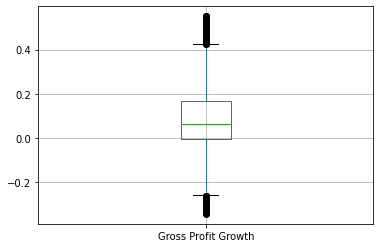

In [21]:
df_clean.boxplot('Gross Profit Growth')

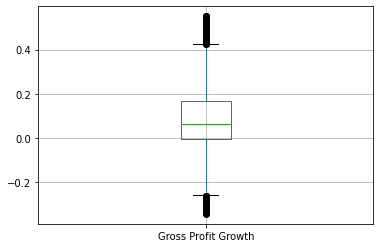

In [22]:
df_clean.boxplot('Gross Profit Growth')

In [23]:
df_clean.shape

(3602, 11)

In [24]:
Q1_1 = df_clean['Gross Margin'].quantile(0.25)
Q3_1 = df_clean['Gross Margin'].quantile(0.75)

IQR_1 = Q3_1 - Q1_1
print(IQR_1)

0.519925


In [25]:
df_clean = df_clean[df_clean['Gross Margin'] > (Q1_1 - 1.5 * IQR_1)]
df_clean = df_clean[df_clean['Gross Margin'] < (Q3_1 + 1.5 * IQR_1)]

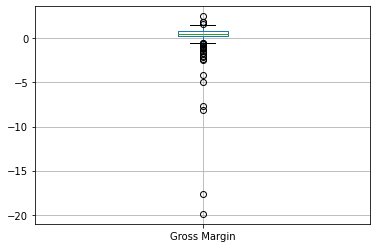

In [26]:
df_new.boxplot('Gross Margin')

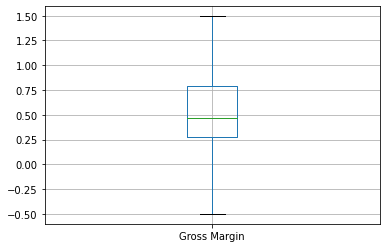

In [27]:
df_clean.boxplot('Gross Margin')

In [28]:
Q1_2 = df_clean['Intangibles to Total Assets'].quantile(0.25)
Q3_2 = df_clean['Intangibles to Total Assets'].quantile(0.75)

IQR_2 = Q3_2 - Q1_2
print(IQR_2)

0.29129999999999995


In [29]:
df_clean = df_clean[df_clean['Intangibles to Total Assets'] > (Q1_2 - 1.5 * IQR_2)]
df_clean = df_clean[df_clean['Intangibles to Total Assets'] < (Q3_2 + 1.5 * IQR_2)]

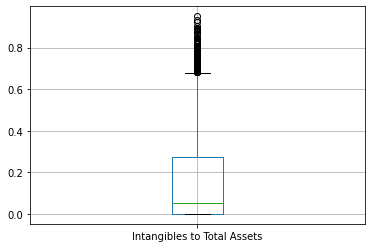

In [30]:
df_new.boxplot('Intangibles to Total Assets')

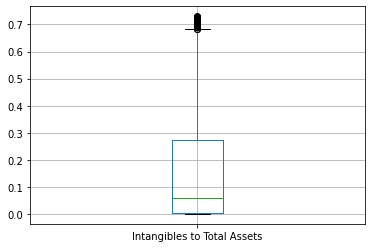

In [31]:
df_clean.boxplot('Intangibles to Total Assets')

In [32]:
Q1_3 = df_clean['Net Income'].quantile(0.25)
Q3_3 = df_clean['Net Income'].quantile(0.75)

IQR_3 = Q3_3 - Q1_3
print(IQR_3)

241636967.5


In [33]:
df_clean = df_clean[df_clean['Net Income'] > (Q1_3 - 1.5 * IQR_3)]
df_clean = df_clean[df_clean['Net Income'] < (Q3_3 + 1.5 * IQR_3)]

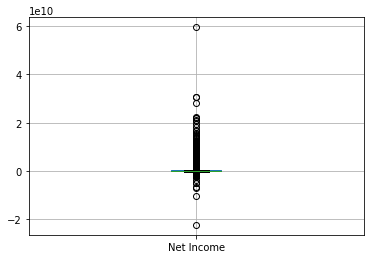

In [34]:
df_new.boxplot('Net Income')

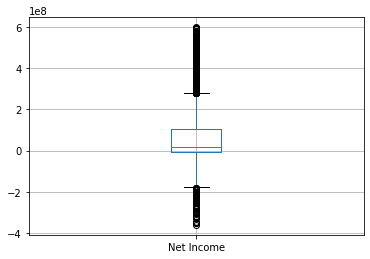

In [35]:
df_clean.boxplot('Net Income')

In [36]:
df_clean.shape

(2951, 11)

In [37]:
Q1_4 = df_clean['assetTurnover'].quantile(0.25)
Q3_4 = df_clean['assetTurnover'].quantile(0.75)

IQR_4 = Q3_4 - Q1_4
print(IQR_4)

0.916383451996485


In [38]:
df_clean = df_clean[df_clean['assetTurnover'] > (Q1_4 - 1.5 * IQR_4)]
df_clean = df_clean[df_clean['assetTurnover'] < (Q3_4 + 1.5 * IQR_4)]

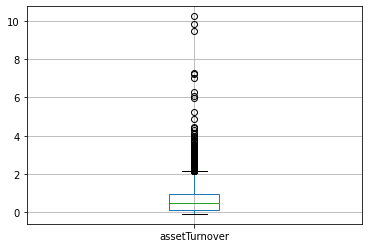

In [39]:
df_new.boxplot('assetTurnover')

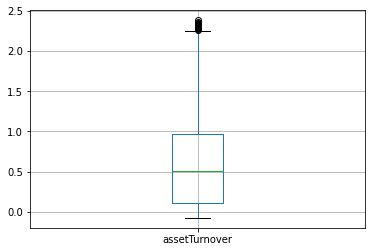

In [40]:
df_clean.boxplot('assetTurnover')

In [41]:
df_clean.shape

(2853, 11)

In [42]:
Q1_5 = df_clean['Revenue'].quantile(0.25)
Q3_5 = df_clean['Revenue'].quantile(0.75)

IQR_5 = Q3_5 - Q1_5
print(IQR_5)

1332142000.0


In [43]:
df_clean = df_clean[df_clean['Revenue'] > (Q1_5 - 1.5 * IQR_5)]
df_clean = df_clean[df_clean['Revenue'] < (Q3_5 + 1.5 * IQR_5)]

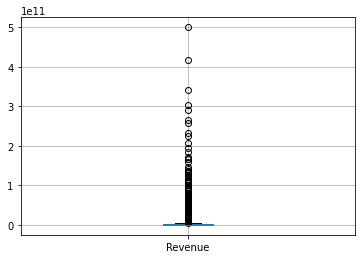

In [44]:
df_new.boxplot('Revenue')

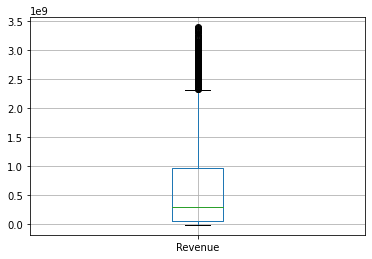

In [45]:
df_clean.boxplot('Revenue')

In [46]:
df_clean.shape

(2572, 11)

In [47]:
Q1_6 = df_clean['Interest Expense'].quantile(0.25)
Q3_6 = df_clean['Interest Expense'].quantile(0.75)

IQR_6 = Q3_6 - Q1_6
print(IQR_6)

22182750.0


In [48]:
df_clean = df_clean[df_clean['Interest Expense'] > (Q1_6 - 1.5 * IQR_6)]
df_clean = df_clean[df_clean['Interest Expense'] < (Q3_6 + 1.5 * IQR_6)]

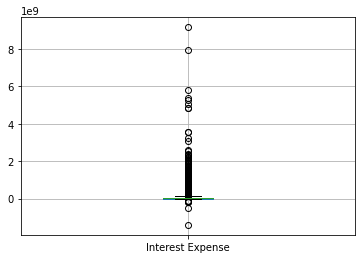

In [49]:
df_new.boxplot('Interest Expense')

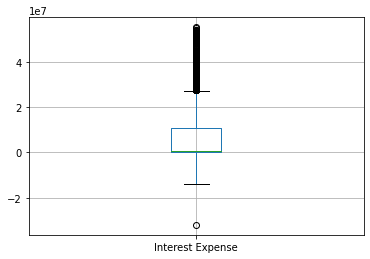

In [50]:
df_clean.boxplot('Interest Expense')

In [51]:
df_clean.shape

(2248, 11)

In [52]:
Q1_7 = df_clean['Debt to Assets'].quantile(0.25)
Q3_7 = df_clean['Debt to Assets'].quantile(0.75)

IQR_7 = Q3_7 - Q1_7
print(IQR_7)

0.313


In [53]:
df_clean = df_clean[df_clean['Debt to Assets'] > (Q1_7 - 1.5 * IQR_7)]
df_clean = df_clean[df_clean['Debt to Assets'] < (Q3_7 + 1.5 * IQR_7)]

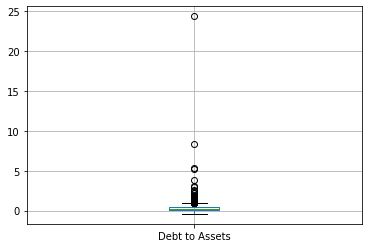

In [54]:
df_new.boxplot('Debt to Assets')

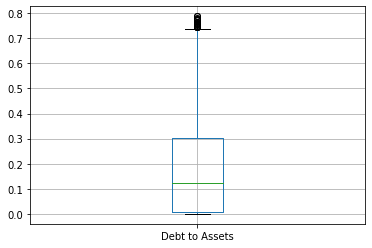

In [55]:
df_clean.boxplot('Debt to Assets')

In [56]:
Q1_8 = df_clean['R&D Expenses'].quantile(0.25)
Q3_8 = df_clean['R&D Expenses'].quantile(0.75)

IQR_8 = Q3_8 - Q1_8
print(IQR_8)

14852750.0


In [57]:
df_clean = df_clean[df_clean['R&D Expenses'] > (Q1_8 - 1.5 * IQR_8)]
df_clean = df_clean[df_clean['R&D Expenses'] < (Q3_8 + 1.5 * IQR_8)]

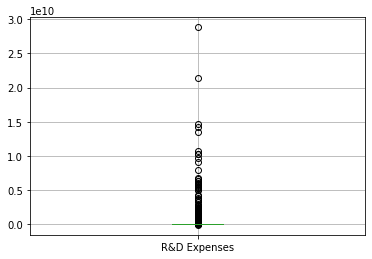

In [58]:
df_new.boxplot('R&D Expenses')

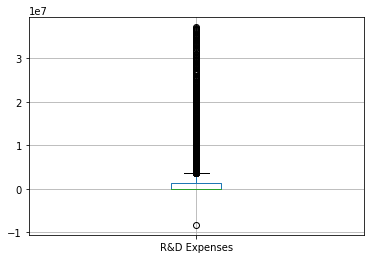

In [59]:
df_clean.boxplot('R&D Expenses')

In [61]:
Q1_9 = df_clean['SG&A Expense'].quantile(0.25)
Q3_9 = df_clean['SG&A Expense'].quantile(0.75)

IQR_9 = Q3_9 - Q1_9
print(IQR_9)

130147732.75


In [62]:
df_clean = df_clean[df_clean['SG&A Expense'] > (Q1_9 - 1.5 * IQR_9)]
df_clean = df_clean[df_clean['SG&A Expense'] < (Q3_9 + 1.5 * IQR_9)]

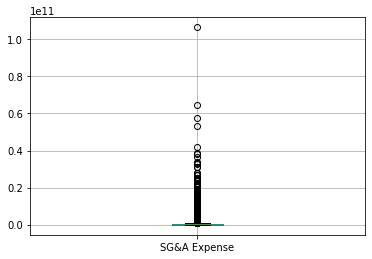

In [63]:
df_new.boxplot('SG&A Expense')

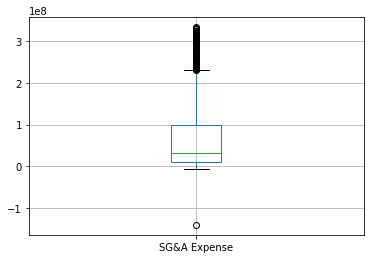

In [64]:
df_clean.boxplot('SG&A Expense')

In [65]:
Q1_label = df['Revenue Growth'].quantile(0.25)
Q3_label = df['Revenue Growth'].quantile(0.75)

IQR_label = Q3_label - Q1_label
print(IQR_label)

0.1885


In [66]:
df_clean = df_clean[df_clean['Revenue Growth'] > (Q1_label - 1.5 * IQR_label)]
df_clean = df_clean[df_clean['Revenue Growth'] < (Q3_label + 1.5 * IQR_label)]

In [67]:
df_clean.shape

(1575, 11)

## Export Cleaned Data

In [68]:
from google.colab import files

df_clean.to_csv('2018_Financial_Data_Cleaned.csv') 
files.download('2018_Financial_Data_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Normalize Cleaned Data

In [69]:
df_normalized = df_clean.copy()

In [70]:
# Minmax Normalization 
for column in df_normalized.columns:
    df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())    
  
print(df_normalized)

      Gross Profit Growth  Gross Margin  Intangibles to Total Assets  \
44               0.384226      0.752144                     0.000000   
111              0.653578      0.412626                     0.573716   
123              0.889964      0.401695                     0.120514   
179              0.369824      0.407461                     0.036996   
205              0.520927      0.529208                     0.115544   
...                   ...           ...                          ...   
4245             0.383213      0.250715                     0.000000   
4247             0.383213      0.250715                     0.061154   
4248             0.383213      0.250715                     0.000000   
4250             0.827970      0.417841                     0.016980   
4251             0.383213      0.250715                     0.003037   

      Net Income  assetTurnover   Revenue  Interest Expense  Debt to Assets  \
44      0.363957       0.032932  0.003488          0.371

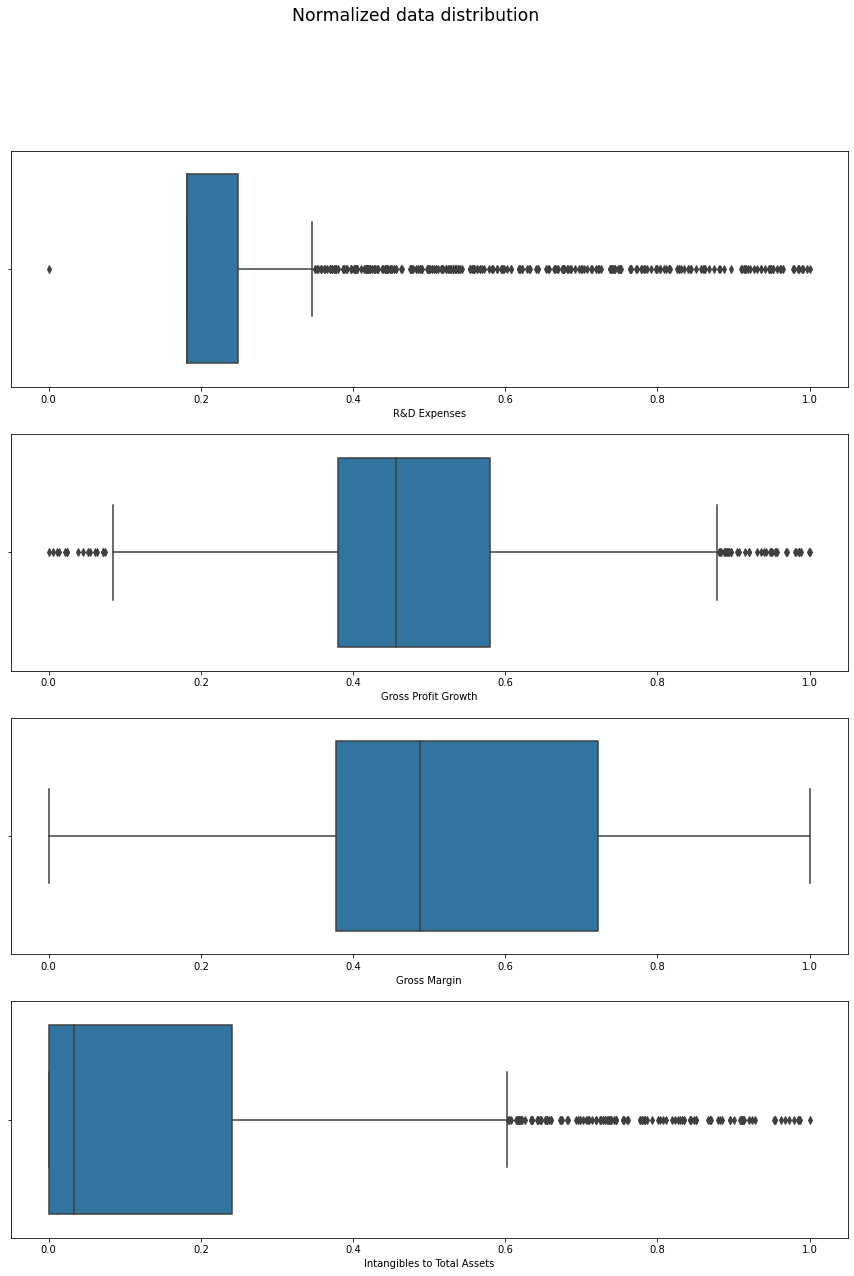

In [71]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
fig.suptitle('Normalized data distribution', fontsize='xx-large')

sns.boxplot(x=df_normalized['R&D Expenses'], ax=axes[0])
axes[0].set_xlabel('R&D Expenses')

sns.boxplot(x=df_normalized['Gross Profit Growth'], ax=axes[1])
axes[1].set_xlabel('Gross Profit Growth')

sns.boxplot(x=df_normalized['Gross Margin'], ax=axes[2])
axes[2].set_xlabel('Gross Margin')

sns.boxplot(x=df_normalized['Intangibles to Total Assets'], ax=axes[3])
axes[3].set_xlabel('Intangibles to Total Assets')

plt.show()

In [72]:
df_normalized.to_csv('2018_Financial_Data_MinMax.csv') 
files.download('2018_Financial_Data_MinMax.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
def z_score(df):
    # copy the dataframe
    df_std = df_clean.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std
    
# call the z_score function
df_standardized = z_score(df_clean)

df_standardized

,Gross Profit Growth,Gross Margin,Intangibles to Total Assets,Net Income,assetTurnover,Revenue,Interest Expense,Debt to Assets,R&D Expenses,SG&A Expense,Revenue Growth
44,-0.495079,1.341699,-0.671247,-0.762497,-1.000915,-0.662843,-0.553527,-0.946931,1.151577,-0.637478,-0.631793
111,1.013239,-0.610570,1.751450,0.065541,0.139622,1.085833,1.228440,0.820972,-0.475470,1.825011,1.191968
123,2.336954,-0.673426,-0.162341,-4.906329,0.000890,5.462707,3.681189,0.099389,-0.475470,0.839426,2.482094
179,-0.575725,-0.640268,-0.515019,2.086617,1.375065,2.504863,-0.513379,-0.946931,-0.475470,1.275723,-0.041307
205,0.270420,0.059792,-0.183326,-0.060687,-0.297859,0.024748,-0.314114,-0.726007,1.187432,0.626988,-0.765202
...,...,...,...,...,...,...,...,...,...,...,...
4245,-0.500750,-1.541581,-0.671247,-0.679748,-1.010481,-0.664807,-0.553527,-0.946931,1.429333,-0.809513,-0.638615
4247,-0.500750,-1.541581,-0.413005,-0.340195,-1.010481,-0.664807,-0.553527,-0.946931,-0.470867,-0.867302,-0.638615
4248,-0.500750,-1.541581,-0.671247,-0.575288,-1.010481,-0.664807,0.354409,0.608230,-0.475470,-0.828892,-0.638615
4250,1.989802,-0.580584,-0.599545,-0.283441,0.184053,-0.563723,-0.451787,0.342815,-0.275283,-0.787093,1.036577


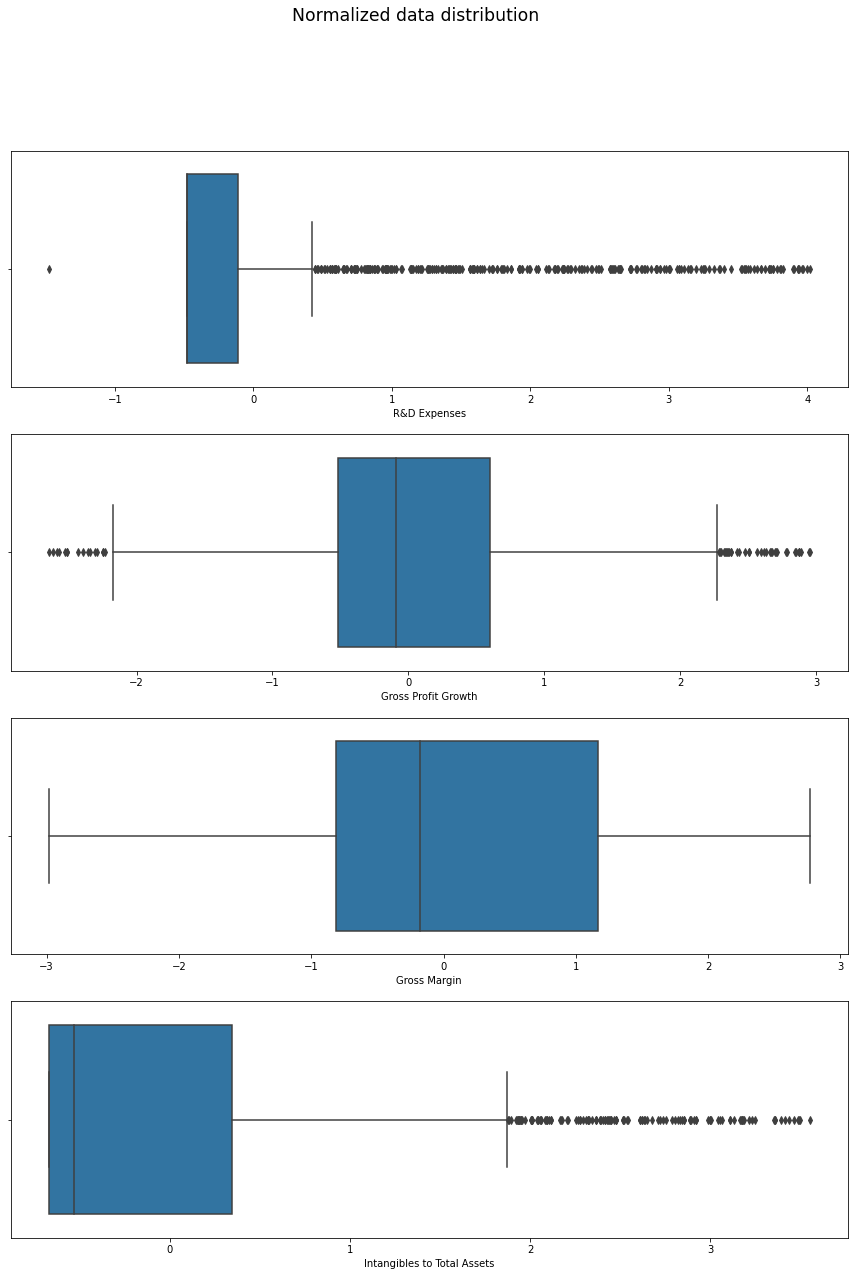

In [74]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
fig.suptitle('Normalized data distribution', fontsize='xx-large')

sns.boxplot(x=df_standardized['R&D Expenses'], ax=axes[0])
axes[0].set_xlabel('R&D Expenses')

sns.boxplot(x=df_standardized['Gross Profit Growth'], ax=axes[1])
axes[1].set_xlabel('Gross Profit Growth')

sns.boxplot(x=df_standardized['Gross Margin'], ax=axes[2])
axes[2].set_xlabel('Gross Margin')

sns.boxplot(x=df_standardized['Intangibles to Total Assets'], ax=axes[3])
axes[3].set_xlabel('Intangibles to Total Assets')

plt.show()

In [75]:
df_standardized.to_csv('2018_Financial_Data_ZScore.csv') 
files.download('2018_Financial_Data_ZScore.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>